In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Dataset/molinetes_historico.csv',sep=';' )

In [3]:
dataset.isnull().sum()

PERIODO            0
FECHA              0
DESDE              0
HASTA              0
LINEA              0
MOLINETE           0
ESTACION           0
PAX_PAGOS          0
PAX_PASES_PAGOS    0
PAX_FRANQ          0
TOTAL              0
ID                 0
dtype: int64

In [4]:
dataset = dataset.loc[dataset.PERIODO == 201712]

In [5]:
dataset.drop(['PAX_PAGOS','PAX_PASES_PAGOS','PAX_FRANQ','ID'],axis=1,inplace=True)

In [6]:
dataset.dtypes

PERIODO      int64
FECHA       object
DESDE       object
HASTA       object
LINEA       object
MOLINETE    object
ESTACION    object
TOTAL        int64
dtype: object

In [7]:
dataset.loc[dataset.TOTAL>0].head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,TOTAL
10949949,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_ACOYTE_N_TURN05,ACOYTE,2
10949950,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_CARABOBO_O_TURN04,CARABOBO,1
10949951,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_CONGRESO_N_TURN02,CONGRESO,1
10949955,201712,01/12/2017,05:00:00,05:15:00,LINEA_B,LINEA_B_DORREGO_N_TURN03,DORREGO,2
10949956,201712,01/12/2017,05:00:00,05:15:00,LINEA_B,LINEA_B_FLORIDA_O_TURN02,FLORIDA,1


In [9]:
dataset.loc[dataset.TOTAL==0].count()

PERIODO     14969
FECHA       14969
DESDE       14969
HASTA       14969
LINEA       14969
MOLINETE    14969
ESTACION    14969
TOTAL       14969
dtype: int64

Describir las columnas segun el tipo de feature

In [9]:
dataset[['LINEA','PERIODO']].groupby('PERIODO').count().sort_index()

,LINEA
PERIODO,
201701,942404
201702,845445
201703,1004536
201704,943662
201705,1020678
201706,1002170
201707,1036720
201708,1053868
201709,1031310


### LINEA

In [20]:
dataset.LINEA = dataset.LINEA.astype('category')
dataset = pd.concat([dataset,pd.get_dummies(dataset['LINEA'] )],axis=1)

### ESTACION

In [21]:
estacion_cat = dataset.ESTACION.unique().tolist()
estacion_rang = range(1,len(estacion_cat)+1)
estacion_map = pd.Series(estacion_rang, index=estacion_cat)
dataset['ESTACION_MAP']=dataset.ESTACION.map(estacion_map)

### MOLINETE

In [22]:
molinete_cat = dataset.MOLINETE.unique().tolist()
molinete_rang = range(1,len(molinete_cat)+1)
molinete_map = pd.Series(molinete_rang, molinete_cat)
dataset['MOLINETE_MAP'] = dataset.MOLINETE.map(molinete_map)

### INTERVALO

In [23]:
dataset['INTERVALO'] = dataset[['DESDE', 'HASTA']].apply(lambda x: '-'.join(x), axis=1)
intervalo_cat = dataset.INTERVALO.unique().tolist()
intervalo_rang = range(1, len(intervalo_cat)+1)
intervalo_map = pd.Series(intervalo_rang, index=intervalo_cat)
dataset['INTERVALO_MAP'] = dataset.INTERVALO.map(intervalo_map)

In [25]:
dataset['NAME_DAY'] =pd.to_datetime(dataset.FECHA).dt.weekday_name
name_day_cat = dataset.NAME_DAY.unique().tolist()
name_day_rang = range(1, len(name_day_cat)+1)
name_day_map = pd.Series(name_day_rang, index=name_day_cat)
dataset['NAME_DAY_MAP'] = dataset.NAME_DAY.map(name_day_map)

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

In [27]:
dataset.head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,TOTAL,LINEA_A,LINEA_B,LINEA_C,LINEA_D,LINEA_E,LINEA_H,ESTACION_MAP,MOLINETE_MAP,INTERVALO,INTERVALO_MAP,NAME_DAY,NAME_DAY_MAP
10949949,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_ACOYTE_N_TURN05,ACOYTE,2,1,0,0,0,0,0,1,1,05:00:00-05:15:00,1,Thursday,1
10949950,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_CARABOBO_O_TURN04,CARABOBO,1,1,0,0,0,0,0,2,2,05:00:00-05:15:00,1,Thursday,1
10949951,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_CONGRESO_N_TURN02,CONGRESO,1,1,0,0,0,0,0,3,3,05:00:00-05:15:00,1,Thursday,1
10949952,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_FLORES_OESTE_TURN04,FLORES,0,1,0,0,0,0,0,4,4,05:00:00-05:15:00,1,Thursday,1
10949953,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_MISERERE_Q_HALL_TURN04,PLAZA MISERERE,0,1,0,0,0,0,0,5,5,05:00:00-05:15:00,1,Thursday,1


### Se eligen solo las columnas mapeadas y nuestra columna target (TOTAL)

In [32]:
dataset_num = dataset[['LINEA_A', 'LINEA_B', 'LINEA_C', 'LINEA_D', 'LINEA_E',
       'LINEA_H', 'ESTACION_MAP', 'MOLINETE_MAP', 'INTERVALO_MAP', 'NAME_DAY_MAP', 'TOTAL']]

dataset_num.head()

In [34]:
#dataset.to_csv('dataset_201712.csv')

#dataset_num.to_csv('dataset_201712_num.csv')

### Modelo de regresión

In [57]:
dataset_num = pd.read_csv('dataset_201712_num.csv' )
dataset = pd.read_csv('dataset_201712.csv',index_col=0 )

In [11]:
len(dataset.columns)

20

In [16]:
len(dataset_num.columns)

11

In [15]:
dataset.head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,TOTAL,LINEA_A,LINEA_B,LINEA_C,LINEA_D,LINEA_E,LINEA_H,ESTACION_MAP,MOLINETE_MAP,INTERVALO,INTERVALO_MAP,NAME_DAY,NAME_DAY_MAP
10949949,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_ACOYTE_N_TURN05,ACOYTE,2,1,0,0,0,0,0,1,1,05:00:00-05:15:00,1,Thursday,1
10949950,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_CARABOBO_O_TURN04,CARABOBO,1,1,0,0,0,0,0,2,2,05:00:00-05:15:00,1,Thursday,1
10949951,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_CONGRESO_N_TURN02,CONGRESO,1,1,0,0,0,0,0,3,3,05:00:00-05:15:00,1,Thursday,1
10949952,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_FLORES_OESTE_TURN04,FLORES,0,1,0,0,0,0,0,4,4,05:00:00-05:15:00,1,Thursday,1
10949953,201712,01/12/2017,05:00:00,05:15:00,LINEA_A,LINEA_A_MISERERE_Q_HALL_TURN04,PLAZA MISERERE,0,1,0,0,0,0,0,5,5,05:00:00-05:15:00,1,Thursday,1


In [58]:
dataset_num.head()

,Unnamed: 0,LINEA_A,LINEA_B,LINEA_C,LINEA_D,LINEA_E,LINEA_H,ESTACION_MAP,MOLINETE_MAP,INTERVALO_MAP,NAME_DAY_MAP,TOTAL
0,10949949,1,0,0,0,0,0,1,1,1,1,2
1,10949950,1,0,0,0,0,0,2,2,1,1,1
2,10949951,1,0,0,0,0,0,3,3,1,1,1
3,10949952,1,0,0,0,0,0,4,4,1,1,0
4,10949953,1,0,0,0,0,0,5,5,1,1,0


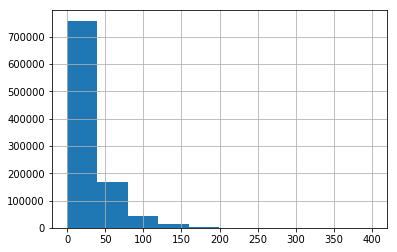

In [7]:
%matplotlib inline 
dataset_num.TOTAL.hist()

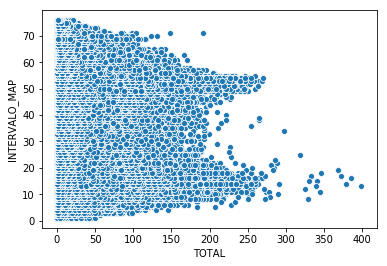

In [6]:
import seaborn as sns 
sns.scatterplot(x = dataset_num.TOTAL, y= dataset_num.INTERVALO_MAP )

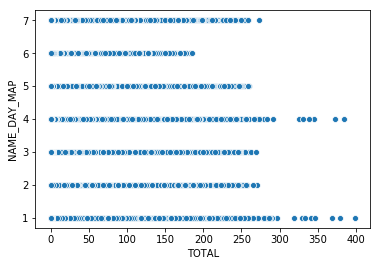

In [8]:
import seaborn as sns 
sns.scatterplot(x = dataset_num.TOTAL, y= dataset_num.NAME_DAY_MAP )

### Split test, train

In [63]:
X.head()

,Unnamed: 0,LINEA_A,LINEA_B,LINEA_C,LINEA_D,LINEA_E,LINEA_H,ESTACION_MAP,MOLINETE_MAP,INTERVALO_MAP,NAME_DAY_MAP
0,10949949,1,0,0,0,0,0,1,1,1,1
1,10949950,1,0,0,0,0,0,2,2,1,1
2,10949951,1,0,0,0,0,0,3,3,1,1
3,10949952,1,0,0,0,0,0,4,4,1,1
4,10949953,1,0,0,0,0,0,5,5,1,1


In [59]:
y = dataset_num.TOTAL
X = dataset_num.drop('TOTAL',axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=30)
regr_1.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [61]:
y_pred = regr_1.predict(X_test)

In [62]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.821632108787143

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5226202221162062

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
x_reduccion = pca.transform(X)

In [35]:
x_reduccion_df.iloc[:,0].head()

0   -265.856604
1   -264.814959
2   -263.773313
3   -262.731668
4   -261.690023
Name: 0, dtype: float64

In [33]:
x_reduccion_df = pd.DataFrame(x_reduccion)

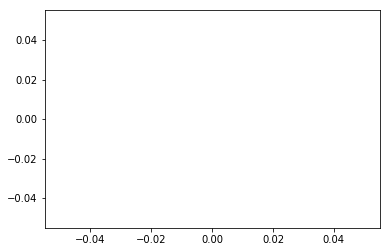

In [34]:
import seaborn as sns 
sns.scatterplot(x = dataset_num.TOTAL, y= x_reduccion_df.iloc[:,0] )

### Con letras

### Split test, train

In [33]:
y = dataset.TOTAL
X = dataset.drop('TOTAL',axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [34]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=30)
regr_1.fit(X_train,y_train)

ValueError: could not convert string to float: '29/12/2017'

____________
> Fin del errror

In [28]:
y_pred = regr_1.predict(X_test)

In [29]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.8218345789440412

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.821824400295416